In [1]:
import numpy as np

x = np.load('features_val.npy',allow_pickle=True)
print(len(x))
lis = []
for i,j in enumerate(x):
    lis.append((i,j))

24777


In [5]:
print(lis[0])
new_dict = {}

for x in lis:
    #print(x[1][1].shape)
    #print(x[1][1][:][0])
    if x[1][0] not in new_dict.keys():
        new_dict[x[1][0]] = []
    new_dict[x[1][0]].append(np.mean(x[1][1],axis=0))
    
new_lis = []
for x in sorted(new_dict.keys()):
    #print(x)
    y = new_dict[x]
    pq = y[0]
    for z in y[1:]:
        pq = np.add(pq,z)
    pq = np.divide(pq,len(y))
    new_lis.append(pq)
print(len(new_lis))

(0, array([140,
       array([[0.0000000e+00, 3.5918164e-01, 5.5052027e-02, ..., 3.0138189e-01,
        1.5802392e-01, 1.9451026e-02],
       [0.0000000e+00, 4.6112486e-03, 1.8111391e-02, ..., 1.8903804e-01,
        3.0171140e-03, 0.0000000e+00],
       [8.6612847e-05, 2.1818273e-01, 2.5485598e-02, ..., 1.4949827e-02,
        1.7347459e-02, 9.9017605e-02],
       ...,
       [0.0000000e+00, 2.4865977e-02, 1.4083683e-01, ..., 1.5539520e+00,
        0.0000000e+00, 2.9365921e-01],
       [0.0000000e+00, 2.1232191e-02, 8.7691717e-02, ..., 1.6216570e+00,
        5.8703814e-02, 3.0224168e-01],
       [6.2587247e-03, 0.0000000e+00, 7.6965332e-02, ..., 5.3494930e-01,
        0.0000000e+00, 3.7188672e-02]], dtype=float32)], dtype=object))
174


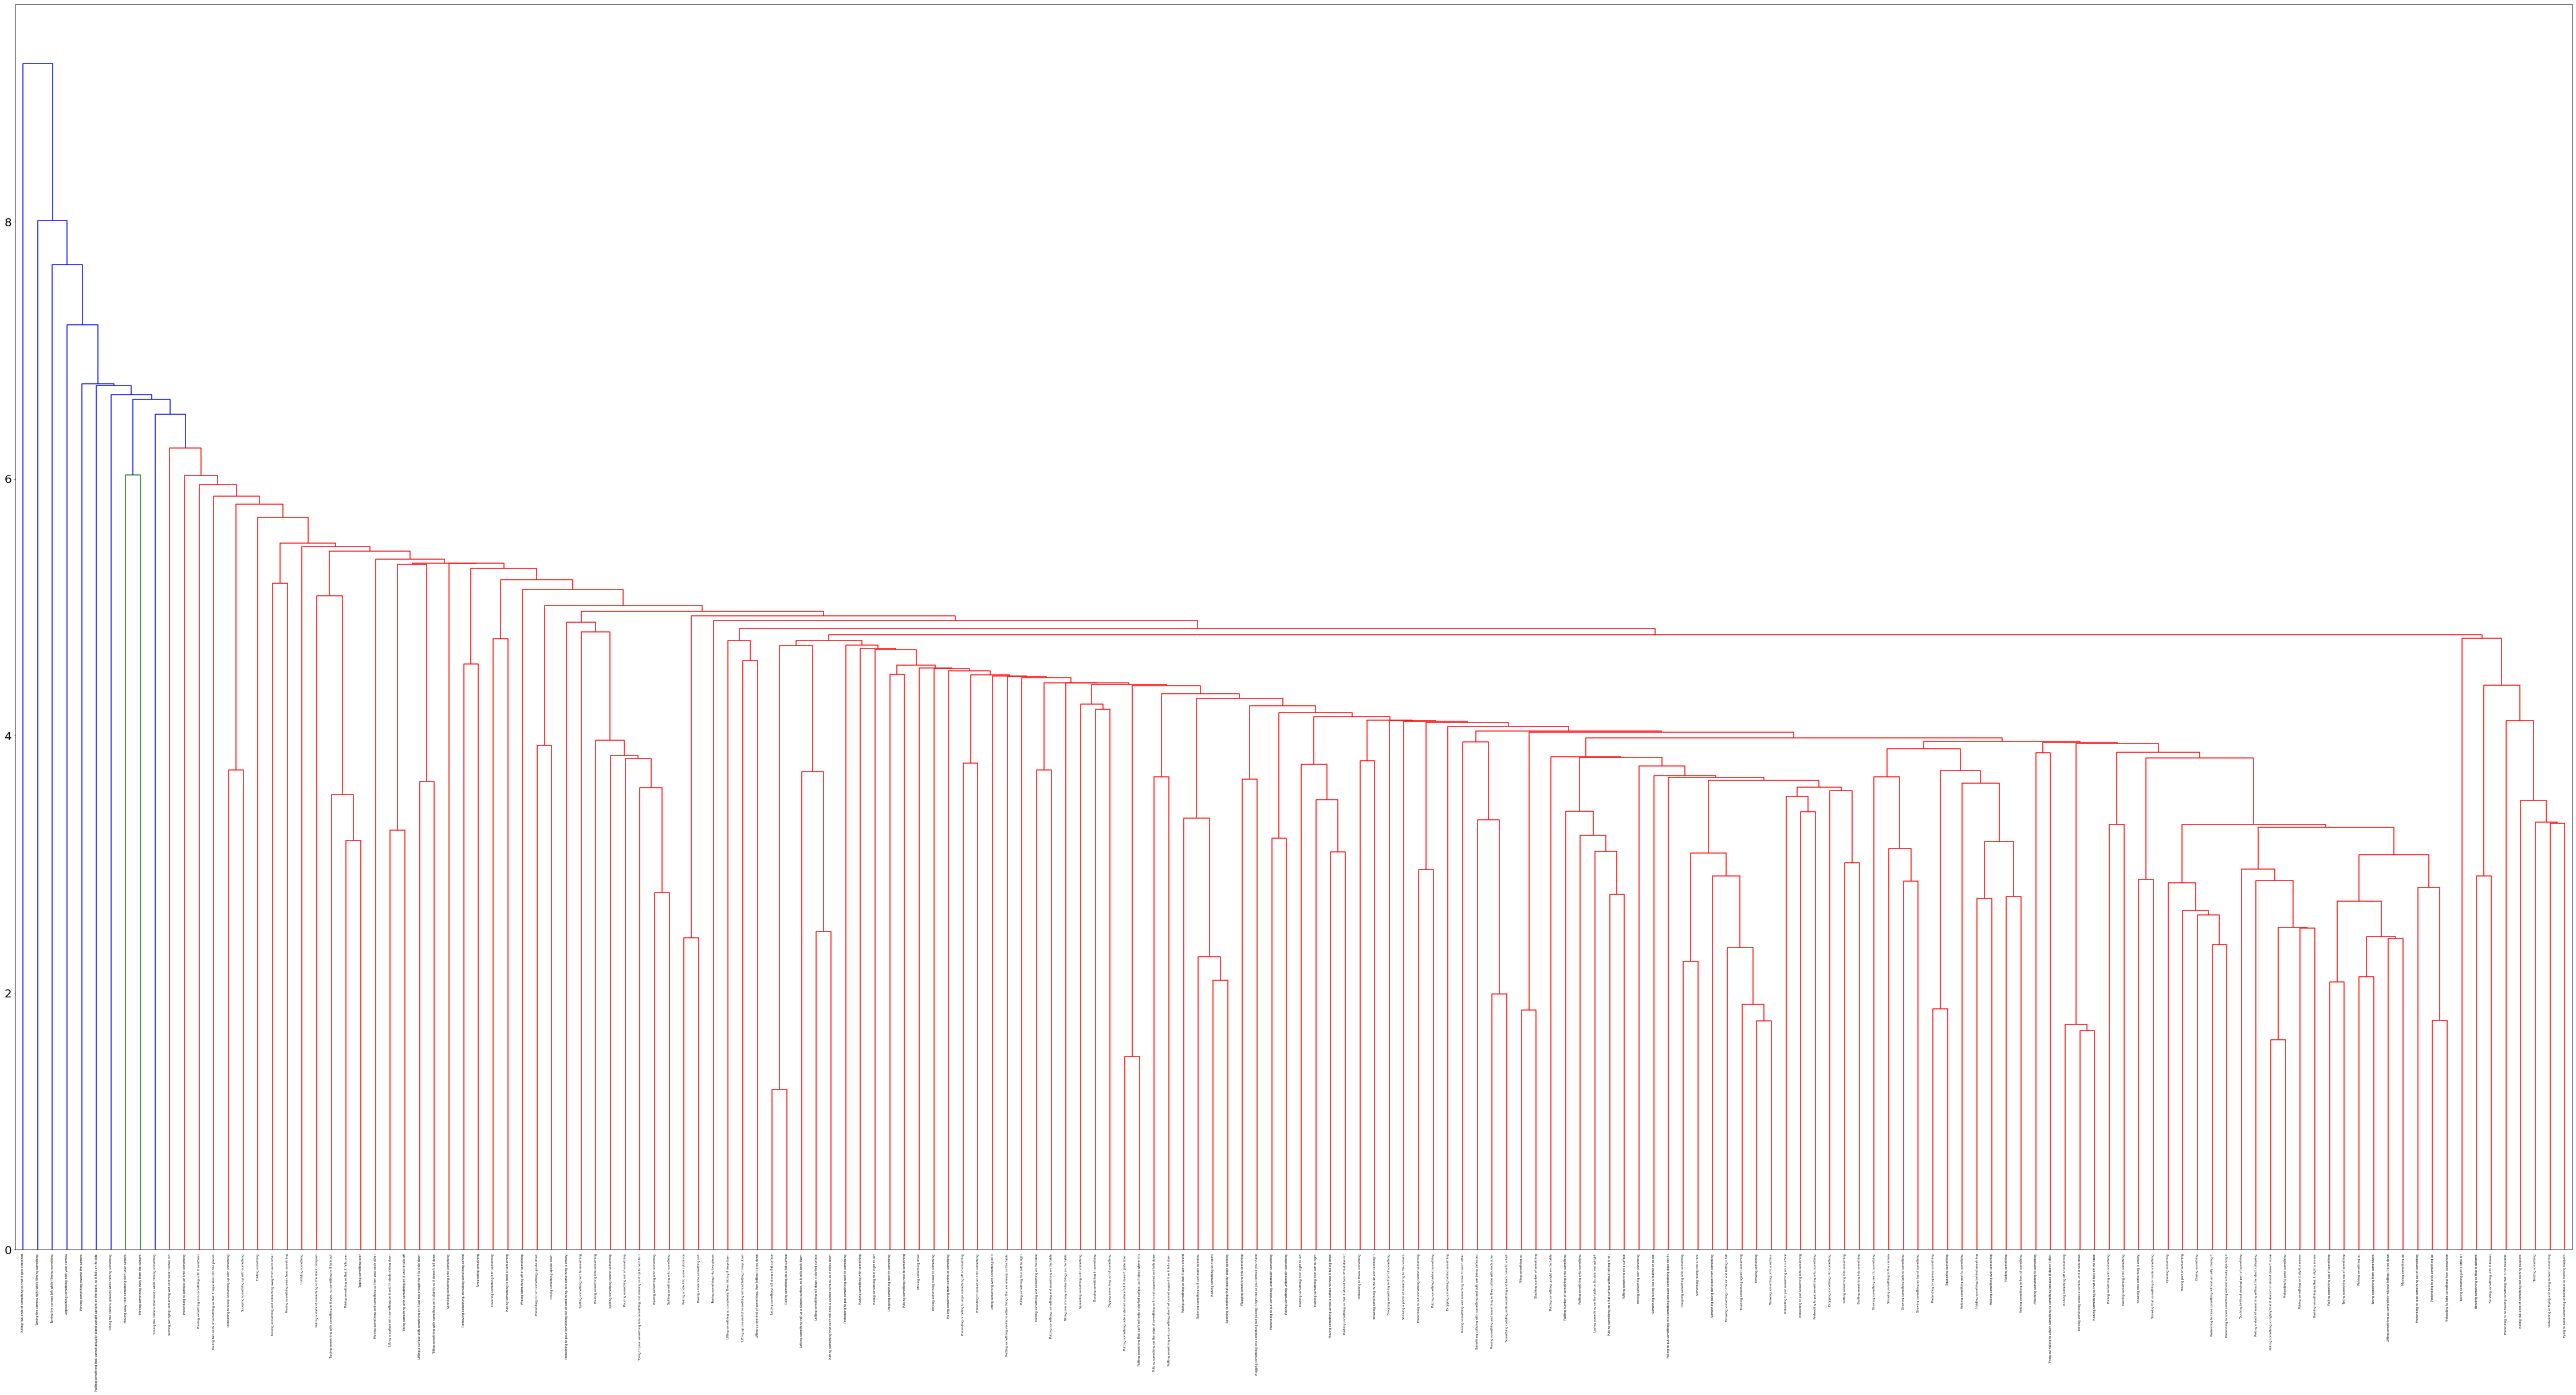

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib
import json

linked = linkage(np.asarray(new_lis), 'single')
with open('../dataset/something-something-v2-labels.json') as f:
    reads = f.read()
    x = json.loads(reads)
rev_id = {}
for a,b in x.items():
    rev_id[b] = a
labelList = [a for a,b in x.items()]

matplotlib.rc('xtick', labelsize=220) 
matplotlib.rc('ytick', labelsize=20)
ax = plt.figure(figsize=(80, 40))
#ax = plt.subplots()
#ax.tick_params(axis='both', which='major', labelsize=10) 
#ax.tick_params(axis='both', which='minor', labelsize=8)
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
fig = plt.gcf()
plt.savefig('foo.png', dpi=400)
#plt.show()
#plt.savefig('clusters.png')
#plt.savefig('foo.png', bbox_inches='tight')


In [7]:
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict

cluster = AgglomerativeClustering(n_clusters=48, affinity='euclidean', linkage='ward')
cluster.fit_predict(np.asarray(new_lis))
print(cluster.labels_)

dic = defaultdict(list)
print(dic)
#print(rev_id)
for i,k in enumerate(cluster.labels_):
    dic[int(k)].append(rev_id[str(i)])
for x,y in dic.items():
    print(y)

[ 7  4 44 44 10  6 33 10 15 15 15  3 15  4 36  4 13 13 13 13 13  9  1  1
  1  2  2 30 30 30 38 38 22  6 26  5 18 21  8  8 18 22 21  6  7 30  6 30
 11 47 47 10 10 19 24 24 24 19 35 27 40 27 27 16 28 45  6  6  6 24 20 41
  4  4  4  4  4 34 16 25 13  6  6  0 12  6  5  5  6  6 28 43 32  5  5 26
  6 35  5 26 24  5 11 23 41 33  4  3  9  9 14  9 11 14  3  1  9 14  4  9
 23 29  1 34 17 17 17 17 17 12 12  0  8  8 15 15 20 27 27 35 35 10 25 13
 11  4  3 30  6 32 45  0  0  0  0  0  2  2 19 19 24  4 28 27 12 46 39 37
 42 31 28 29 36 16]
defaultdict(<class 'list'>, {})
['Approaching something with your camera', 'Moving something towards the camera']
['Attaching something to something', 'Failing to put something into something because something does not fit', 'Hitting something with something', 'Pretending to put something into something', 'Pretending to put something next to something', 'Pretending to put something on a surface', 'Pretending to put something onto something', 'Pretending to put some

In [8]:
import scipy
def cos_cdist(vector):
    # getting cosine distance between search image and images database
    v = vector.reshape(1, -1)
    return scipy.spatial.distance.cdist(new_lis, v, 'cosine').reshape(-1)

for i,f in enumerate(new_lis):
    img_distances = cos_cdist(f)
    nearest_ids = np.argsort(img_distances)[:5].tolist()
    #print(rev_id[str(i)])
    lis = [rev_id[str(x)] for x in nearest_ids]
    print(lis)
    

['Approaching something with your camera', 'Moving something towards the camera', 'Showing something to the camera', 'Showing that something is inside something', 'Showing that something is empty']
['Attaching something to something', 'Plugging something into something', "Trying but failing to attach something to something because it doesn't stick", 'Pretending to close something without actually closing it', 'Plugging something into something but pulling it right out as you remove your hand']
['Bending something so that it deforms', 'Bending something until it breaks', 'Twisting something', 'Trying to bend something unbendable so nothing happens', 'Pretending or trying and failing to twist something']
['Bending something until it breaks', 'Bending something so that it deforms', 'Trying to bend something unbendable so nothing happens', 'Pulling two ends of something so that it separates into two pieces', 'Twisting something']
['Burying something in something', 'Digging something out of

['Taking one of many similar things on the table', 'Putting something similar to other things that are already on the table', 'Taking something from somewhere', 'Pulling something out of something', 'Taking something out of something']
['Taking something from somewhere', 'Picking something up', 'Pulling something out of something', 'Taking something out of something', 'Lifting something up completely without letting it drop down']
['Taking something out of something', 'Pulling something out of something', 'Taking something from somewhere', 'Pretending to take something out of something', 'Moving part of something']
['Tearing something into two pieces', 'Tearing something just a little bit', 'Pulling two ends of something so that it separates into two pieces', 'Pulling something out of something', 'Pretending to be tearing something that is not tearable']
['Tearing something just a little bit', 'Tearing something into two pieces', 'Pretending to be tearing something that is not tearable

In [2]:
import h5py
import numpy as np
import deepdish as dd
abc = np.asarray([1,2,3],dtype=np.float32)
dic = {'14324':[1,[[1],2,3,4]],'1212':[2,[1,2]],'11':abc}
s = str(dic)
print(s)
dd.io.save('test.h5', {'data': dic}, compression=None)

#with h5py.File('feat.hdf5','w') as f:
#    f.create_dataset(s,dtype="f")

{'14324': [1, [[1], 2, 3, 4]], '1212': [2, [1, 2]], '11': array([1., 2., 3.], dtype=float32)}


/home/rijul/.conda/envs/py1/lib/python3.6/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '14324'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/rijul/.conda/envs/py1/lib/python3.6/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '1212'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/rijul/.conda/envs/py1/lib/python3.6/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '11'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will st

In [4]:
'''import ast 
h = h5py.File('feat.hdf5','r')
for x in h:
    print(x[:100])
    res = ast.literal_eval(x)
    print(x)
print(type(res))
for k,v in res.items():
    print(v)
h.close()'''
x = dd.io.load('feats_train.h5')
print(type(x['data']))
print(x)
#print(x['data'][1][1][0].shape)

<class 'list'>
{'data': []}


In [ ]:
import numpy as np
x = np.load('features.npy',allow_pickle=True)
print(x.shape)
for y in x:
    print(y[1].shape)

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import SGD
import numpy as np
x = np.load('features.npy',allow_pickle=True)

'''def define_model(in_shape=(8,2048), out_shape=174):
    model = Sequential()
    model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'),input_shape=in_shape)
    model.add(Dense(out_shape, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['categorical_accuracy'])
    return model

model = define_model()'''
x = x[:100,]
y = [a[0] for a in x]
x = [a[1] for a in x]
#print(y,x)
#history = model.fit_generator(train_it, steps_per_epoch=len(x), epochs=200, verbose=0)
from torch import nn
import torch.optim as optim
from torch.autograd import Variable
import torch

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(16384,2048)
        self.output = nn.Linear(2048, 174)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        #print(x.size())
        
        return x
net = Network()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for data in zip(x,y):
        inputs, labels = data
        labels = np.asarray([0 if x!= labels else 1 for x in range(174)])
        #print(labels)
        inputs = inputs.reshape(-1)
        inputs = Variable(torch.from_numpy(inputs))
        labels = Variable(torch.from_numpy(labels))
        optimizer.zero_grad()
        outputs = net(inputs)
        print(outputs.size(),labels.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

print('Finished Training')